First few rows of the data:
        number  days  gender    age  afftype  melanch  inpatient    edu  \
0  condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1  condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2  condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3  condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4  condition_5    13       2  50-54      2.0      2.0        2.0  11-15   

   marriage  work  madrs1  madrs2  
0       1.0   2.0    19.0    19.0  
1       2.0   2.0    24.0    11.0  
2       2.0   2.0    24.0    25.0  
3       1.0   1.0    20.0    16.0  
4       2.0   2.0    26.0    26.0  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-nu

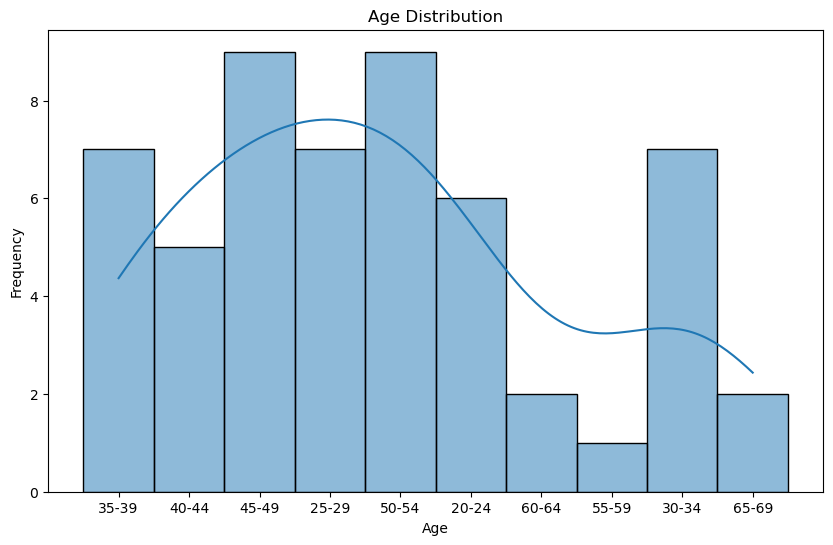

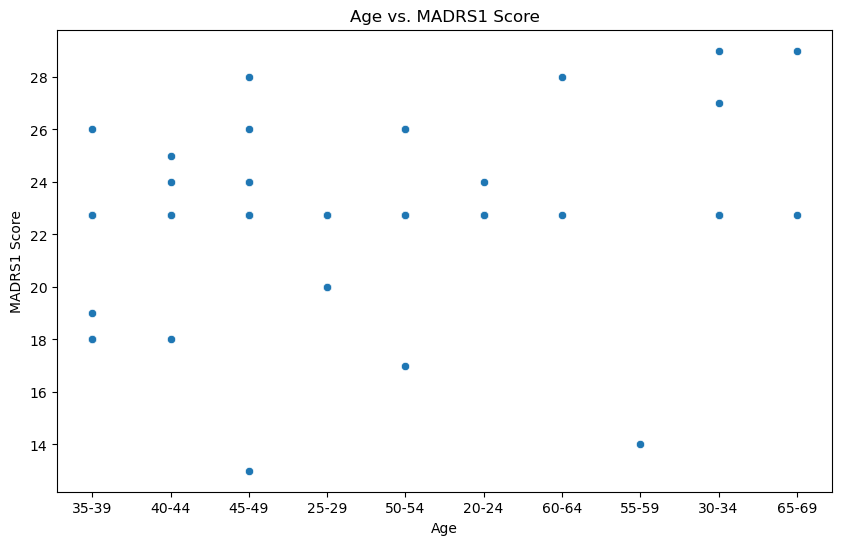

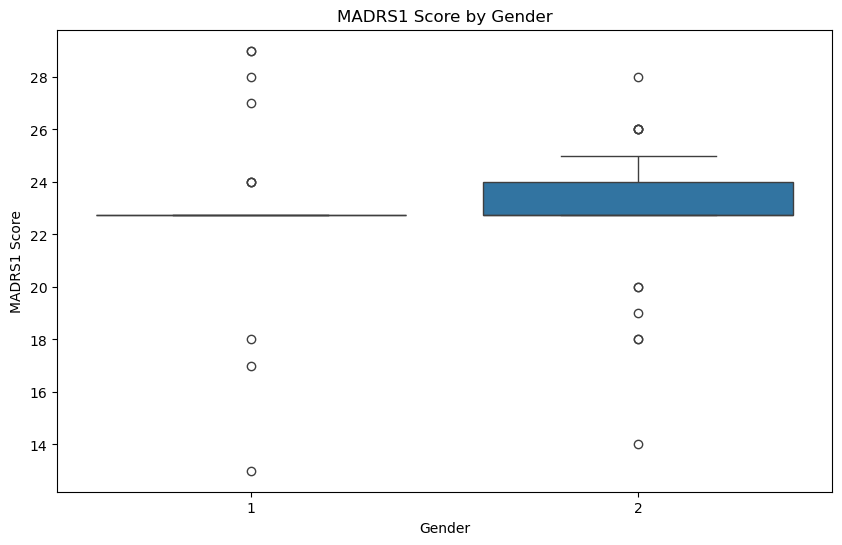

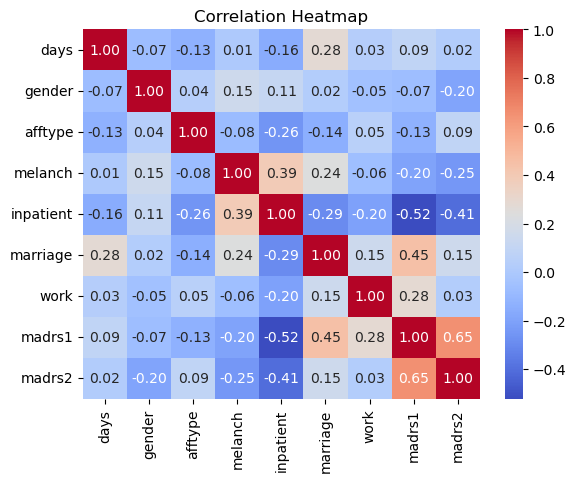

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data = pd.read_csv('scores.csv')  


print("First few rows of the data:")
print(data.head())

print("\nDataFrame Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns


data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


print("\nSummary Statistics:")
print(data.describe())


print("\nUnique Value Counts in 'gender':")
print(data['gender'].value_counts())

print("\nUnique Value Counts in 'afftype':")
print(data['afftype'].value_counts())




plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='madrs1', data=data)
plt.title('Age vs. MADRS1 Score')
plt.xlabel('Age')
plt.ylabel('MADRS1 Score')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='madrs1', data=data)
plt.title('MADRS1 Score by Gender')
plt.xlabel('Gender')
plt.ylabel('MADRS1 Score')
plt.show()

numeric_data = data.select_dtypes(include=['float64', 'int64'])  
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



data.to_csv('cleaned_data.csv', index=False)


